# Desafío 3 - Grupo 7

## Integrantes:

- Bobbio, Paula
- Sammartino, Virginia
- Cocio, Alex Federico
- Onno, Olivier (?

## Lectura del dataset

In [243]:
import numpy as np
import pandas as pd

In [244]:
data = pd.read_csv('../Data/Aprender2018-primaria-6.csv', sep=';')

The reason you get this low_memory warning is because guessing dtypes for each column is very memory demanding. Pandas tries to determine what dtype to set by analyzing the data in each column. 

Fuente: https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

In [245]:
data.sample(5)

,ap1,ap2,ap3a,ap3b,ap3c,ap4,ap5a,ap5b,ap5c,ap5d,...,ponder,lpondera,ldesemp,lpuntaje,mpondera,mdesemp,mpuntaje,isocioa,isocioal,isocioam
119040,2,2,1,8,8,7,1,1,2,1,...,"1,3677895","1,3705808",3,"501,59915","1,4212745",3,"539,47705",-1,-1,-1
172370,2,1,1,1,1,3,1,1,2,1,...,"1,0371844","1,0374942",4,"592,75177","1,0373249",3,"578,56769",2,2,2
368499,2,1,1,1,1,2,1,1,2,2,...,"1,0731561","1,0708604",4,"589,1311","1,0698919",4,"637,81909",2,2,2
227616,2,2,1,1,8,2,1,1,-9,-9,...,"1,0373766","1,0758246",1,"376,31744","1,0402313",1,"370,05673",2,2,2
344700,3,2,1,1,1,5,-9,-9,-9,-9,...,"1,1090286","1,1476135",2,"420,71201","1,1091789",3,"485,88559",2,2,2


## Feature Selection

Descartamos manualmente las variables que consideramos redundantes para el problema. Estas son:
- Indice del Contexto Social de la Educación
- Factor de expansión (solo para variable cuestionario complementario)
- Factor de expansión prueba de Lengua
- Puntaje en Lengua
- Factor de expansión prueba de Matemática
- Puntaje en Matemática
- Indice socioeconómico del alumno
- Indice socioeconómico del alumno ponderador Lengua
- Indice socioeconómico del alumno ponderador Matemática

- Desempeño en Lengua

**¿Deberíamos explicar por qué?**

In [246]:
columns_to_drop = ['ICSE','ponder','lpondera','lpuntaje','mpondera','mpuntaje','isocioa','isocioal','isocioam', 'ldesemp']
data1 = data.drop(columns_to_drop, axis=1)
print('Eliminamos', data.shape[1]-data1.shape[1], 'columnas.')

Eliminamos 10 columnas.


# Analizamos algunas características del dataset

In [247]:
# ¿Cuántas observaciones hay en la tabla?
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579510 entries, 0 to 579509
Columns: 114 entries, ap1 to mdesemp
dtypes: int64(113), object(1)
memory usage: 504.0+ MB


In [248]:
# Dimensión del dataframe
print('El dataset tiene', data1.shape[0], 'filas y', data1.shape[1], 'columnas.') 

El dataset tiene 579510 filas y 114 columnas.


In [249]:
# ¿Qué tipo de datos tiene?
data1.dtypes.value_counts()

int64     113
object      1
dtype: int64

In [250]:
# ¿Hay datos faltantes?
print('Datos faltantes:', data1.isnull().any(axis=1).sum())

Datos faltantes: 0


In [251]:
# ¿Están balanceados los datos de la variable target?
data1.mdesemp.value_counts(normalize=True, ascending=False).round(2)

3    0.37
2    0.21
4    0.20
1    0.18
     0.05
Name: mdesemp, dtype: float64

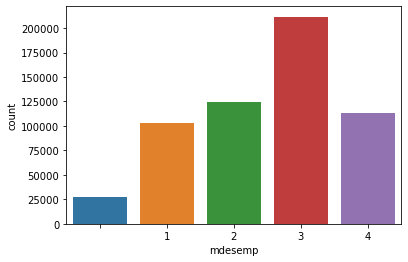

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(data1.mdesemp.sort_values(), label="Count")
plt.show()

## Algunas consideraciones

1) Elimino las filas que no especifica ningún valor en la columna target

In [253]:
empty_mask = data1.mdesemp == ' '
data1.loc[empty_mask,:]

,ap1,ap2,ap3a,ap3b,ap3c,ap4,ap5a,ap5b,ap5c,ap5d,...,ap39,ap40,ap41a,ap41b,ap41c,ap42,cod_provincia,sector,ambito,mdesemp
11,3,1,1,1,1,3,2,2,-9,-9,...,-1,-1,1,1,-9,-1,6,1,1,
45,2,1,1,1,1,7,1,2,2,2,...,-1,-1,2,2,-9,-1,6,1,1,
61,2,1,1,2,2,4,1,1,-9,1,...,-1,-1,2,2,1,-1,6,1,1,
62,3,1,1,1,1,4,1,1,2,1,...,-1,-1,2,3,1,-1,6,1,1,
63,2,1,1,1,1,6,1,2,2,1,...,-1,-1,-9,-9,-9,-1,6,1,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579431,2,2,1,1,1,3,1,1,2,1,...,-1,-1,2,3,1,-1,94,1,1,
579432,2,2,1,1,1,3,1,2,2,2,...,-1,-1,2,4,2,-1,94,1,1,
579483,3,2,1,1,1,5,1,1,2,2,...,-1,-1,1,-9,-6,-1,94,1,1,
579493,2,2,8,8,8,4,1,1,-9,-9,...,-1,-1,-9,-9,-9,-1,94,1,1,


In [254]:
indexNames = data1[empty_mask].index
data2 = data1.drop(indexNames)

3    0.38
2    0.23
4    0.21
1    0.19
Name: mdesemp, dtype: float64


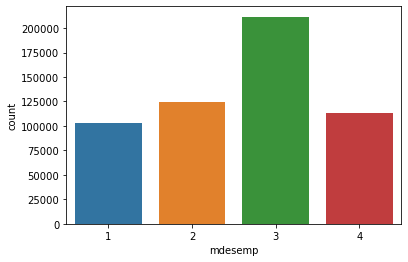

In [255]:
print(data2.mdesemp.value_counts(normalize=True, ascending=False).round(2))

sns.countplot(data2.mdesemp.sort_values(), label="Count")
plt.show()

**Podría mejorar el gráfico (agregando labels adentro de la figura que indiquen las proporciones de cada barra)**

2) Creamos una muestra para agilizar el tiempo computacional

In [256]:
data2_sample = data2.sample(frac=0.5, random_state=2)
print('Vamos a trabajar con una muestra del', round(data2_sample.shape[0]/data2.shape[0],1)*100,'% del dataset.')

Vamos a trabajar con una muestra del 50.0 % del dataset.


3    0.38
2    0.22
4    0.21
1    0.19
Name: mdesemp, dtype: float64


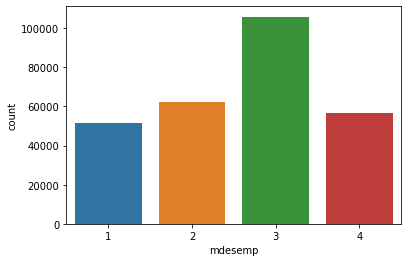

In [257]:
print(data2_sample.mdesemp.value_counts(normalize=True, ascending=False).round(2))

sns.countplot(data2_sample.mdesemp.sort_values(), label="Count")
plt.show()

## Gridsearch

In [258]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

Armamos la matriz de predictores ($X$) (vamos a seleccionar sólo algunas columnas) y el target ($y$) (que es el nivel de desempeño en Matemática)

In [259]:
cols=['ap1','ap2','ap4','ap7a','ap7b','ap7c','ap9','ap14','ap16', 'ap17']
X = data2_sample[cols]
y = data2_sample['mdesemp']

Renombramos el nombre de las columnas con un diccionario

In [260]:
#Crear un diccionario para reemplazar el nombre de las columnas

Nos fijamos la distribución de las etiquetas para evaluar si hay un desbalanceo en las clases:

In [261]:
y.value_counts(normalize=True)

3    0.383387
2    0.224864
4    0.205992
1    0.185757
Name: mdesemp, dtype: float64

Suponiendo que están relativamente balanceadas, continuamos... **(caso contrario, ¿cómo balanceo? ¿transformando las 4 clases en 2?)**

Hacemos el split entre train y test (y por las dudas usamos el argumento de **stratify** para mantener la proporción de los niveles en los datos de train y test):

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=56)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(220812, 10)

(55204, 10)

(220812,)

(55204,)

¿Hace falta estandarizar en este caso? Los features están en las mismas unidades pero las escalas podrían ser distintas

The type of encoding used here is called "label encoding" - and it is very simple: we just assign an ID for a categorical value.

Our computer now knows how to represent these categories, because it knows how to work with numbers. However, this method of encoding is not very effective, because it tends to naturally give the higher numbers higher weights.

It wouldn't make sense to say that our category of "Argentina" is greater or smaller than "Paraguay", or that adding the category "Lemon" to "Peach" would give us a category "Orange", since these values are not ordinal.

If we represented these categories in one-hot encoding, we would actually replace the rows with columns. We do this by creating one boolean column for each of our given categories, where only one of these columns could take on the value 1 for each sample.

In [263]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(handle_unknown='ignore')
# fiteo y transformo la columna "ap2" (Sexo)
dummy_oneHot = onehot_encoder.fit_transform(data2_sample[['ap2']])
# pongo un vector en un dataset.
dummy_oneHot = pd.DataFrame(dummy_oneHot.toarray(),columns=data2_sample['ap2'].unique())
dummy_oneHot.head()

,1,2,-9,-6
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0


Como la codificación **"One-Hot-Enconding" induce una multicolinealidad perfecta**, eliminamos una de las columnas de las características codificadas

In [264]:
onehot_encoder2 = OneHotEncoder(drop='first')
# fiteo y transformo la columna "ap7a" (conexión a internet)
dummy_oneHot_correct = onehot_encoder2.fit_transform(data2_sample[['ap7a']])
# pongo un vector en un dataset.
dummy_oneHot_correct = pd.DataFrame(dummy_oneHot_correct.toarray())
dummy_oneHot_correct.head()

,0,1,2
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [265]:
# La codificación ONE HOT ENCODING hay que hacerla para todas las features categóricas (es decir, todas)

In [266]:
# Ojo! Evitar la multicolinealidad perfecta

Utilizaremos la variables "mdesemp" para generar una variable derivada que tenga en cuenta que es mejor si el desempeño es "satsifactorio". Con esto podemos generar por ejemplo una variable categórica que puede ser utilizada como vector "objetivo" en un problema de clasificación.

In [230]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(data2_sample['mdesemp'])

### Ahora usar GRIDSEARCH CV